In [1166]:
!which python
!python --version

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.gridspec import GridSpec 
import numpy as np

/home/niel/anaconda3/bin/python
Python 3.9.13


In [1167]:
def clip3(x, y, z):
    # np.clip(z, x, y)
    if z < x:
        return x
    elif z > y:
        return y
    else:
        return z

# D. Intra Prediction

## D.1. Recursive Prediction

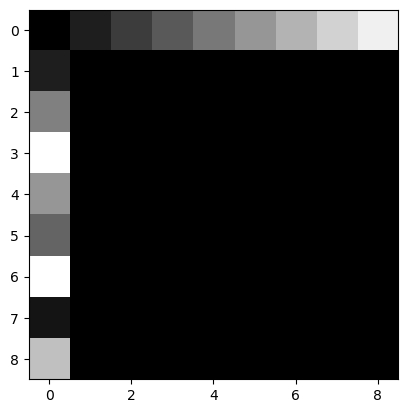

In [1168]:
dummy_image_4x2 = np.asarray([
    [0, 30, 60, 90, 120, 150, 180, 210, 240],
    [30, 0, 0, 0, 0, 0, 0, 0, 0],
    [128, 0, 0, 0, 0, 0, 0, 0, 0],
    [255, 0, 0, 0, 0, 0, 0, 0, 0],
    [150, 0, 0, 0, 0, 0, 0, 0, 0],
    [100, 0, 0, 0, 0, 0, 0, 0, 0],
    [255, 0, 0, 0, 0, 0, 0, 0, 0],
    [20, 0, 0, 0, 0, 0, 0, 0, 0],
    [192, 0, 0, 0, 0, 0, 0, 0, 0],
])
fig = plt.figure()
ax = fig.add_subplot()
ax.imshow(dummy_image_4x2, cmap="gray")
plt.savefig("default.svg", format="svg", bbox_inches='tight')
plt.show()

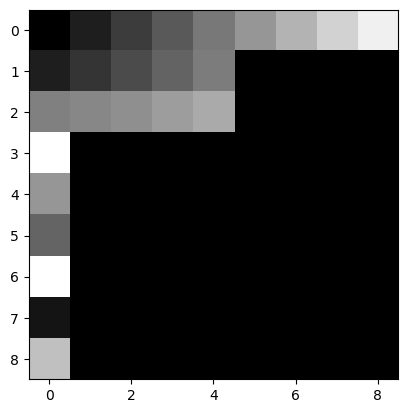

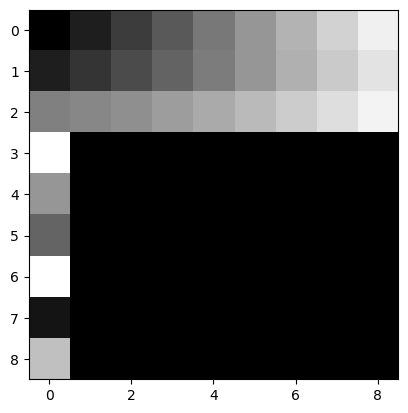

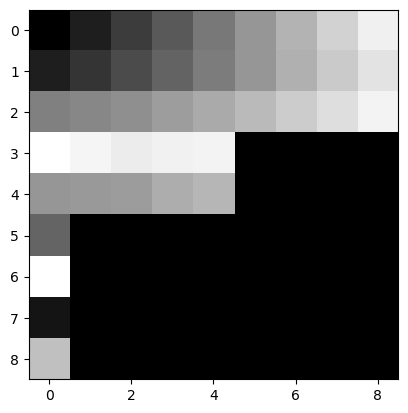

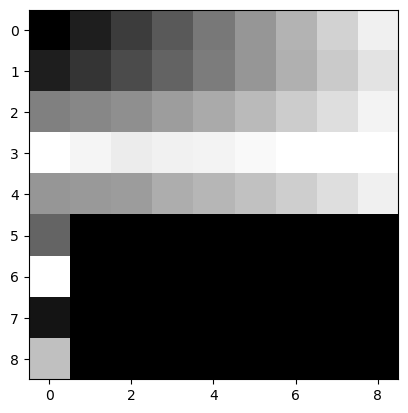

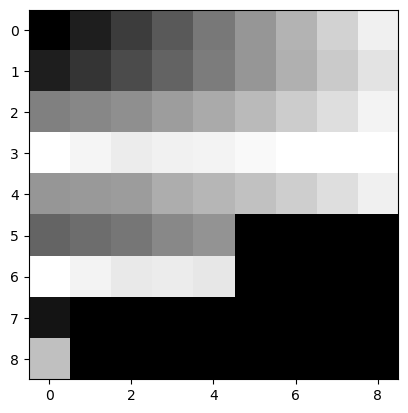

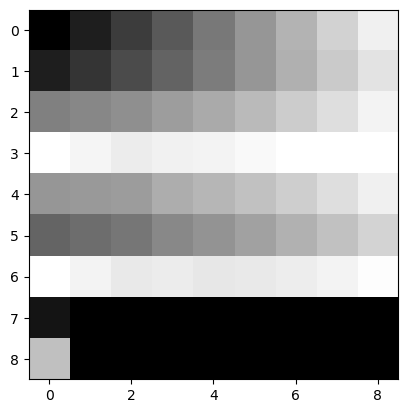

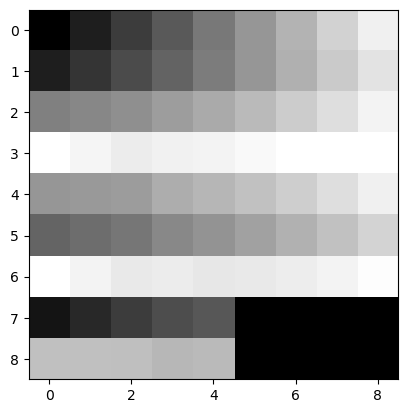

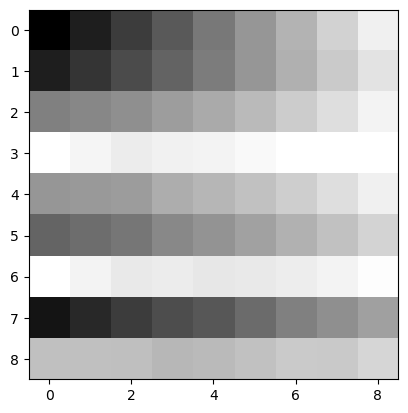

In [1169]:
out = dummy_image_4x2.copy()

filter_tap_dc = np.asarray([
    [-6, 10, 0, 0, 0, 12, 0],
    [-5, 2, 10, 0, 0, 9, 0],
    [-3, 1, 2, 10, 0, 7, 0],
    [-3, 1, 1, 2, 10, 5, 0],
    [-4, 6, 0, 0, 0, 2, 12],
    [-3, 2, 6, 0, 0, 2, 9],
    [-3, 2, 2, 6, 0, 2, 7],
    [-3, 1, 2, 2, 6, 3, 5]
])

filter_tap_v = np.asarray([
    [-10, 16, 0, 0, 0, 10, 0],
    [-6, 0, 16, 0, 0, 6, 0],
    [-4, 0, 0, 16, 0, 4, 0],
    [-2, 0, 0, 0, 16, 2, 0],
    [-10, 16, 0, 0, 0, 0, 10],
    [-6, 0, 16, 0, 0, 0, 6],
    [-4, 0, 0, 16, 0, 0, 4],
    [-2, 0, 0, 0, 16, 0, 2]
])

filter_tap_h = np.asarray([
    [-8, 8, 0, 0, 0, 16, 0],
    [-8, 0, 8, 0, 0, 16, 0],
    [-8, 0, 0, 8, 0, 16, 0],
    [-8, 0, 0, 0, 8, 16, 0],
    [-4, 4, 0, 0, 0, 0, 16],
    [-4, 0, 4, 0, 0, 0, 16],
    [-4, 0, 0, 4, 0, 0, 16],
    [-4, 0, 0, 0, 4, 0, 16]
])

filter_tap_d157 = np.asarray([
    [-2, 8, 0, 0, 0, 10, 0],
    [-1, 3, 8, 0, 0, 6, 0],
    [-1, 2, 3, 8, 0, 4, 0],
    [0, 1, 2, 3, 8, 2, 0],
    [-1, 4, 0, 0, 0, 3, 10],
    [-1, 3, 4, 0, 0, 4, 6],
    [-1, 2, 3, 4, 0, 4, 4],
    [-1, 2, 2, 3, 4, 3, 3]
])

filter_tap_paeth = np.asarray([
    [-12, 14, 0, 0, 0, 14, 0],
    [-10, 0, 14, 0, 0, 12, 0],
    [-9, 0, 0, 14, 0, 11, 0],
    [-8, 0, 0, 0, 14, 10, 0],
    [-10, 12, 0, 0, 0, 0, 14],
    [-9, 1, 12, 0, 0, 0, 12],
    [-8, 0, 0, 12, 0, 1, 11],
    [-7, 0, 0, 1, 12, 1, 9]
])

for i in range(0, 4):
    for j in range(0, 2):
        offset_i, offset_j = i*2 + 1, j*4 + 1
        x_indices = np.asarray([[offset_i + (a // 4), offset_j + (a % 4)] for a in range(8)])
        p_indices = np.asarray([
            out[offset_i - 1][offset_j - 1],
            out[offset_i - 1][offset_j + 0],
            out[offset_i - 1][offset_j + 1],
            out[offset_i - 1][offset_j + 2],
            out[offset_i - 1][offset_j + 3],
            out[offset_i + 0][offset_j - 1],
            out[offset_i + 1][offset_j - 1],
        ])
        pred = (filter_tap_paeth @ p_indices + 8) // 16
        pred = np.clip(pred, 0, 255)
        
        for idx, (xi, yi) in enumerate(x_indices):
            out[xi][yi] = pred[idx]

        fig = plt.figure()
        ax = fig.add_subplot()
        ax.imshow(out, cmap='gray')
        plt.savefig(f'img_{i}x{j}.svg', format="svg", bbox_inches='tight')
        plt.show()    


## D.2. Directional Prediction

### D.2.a. Corner Filter

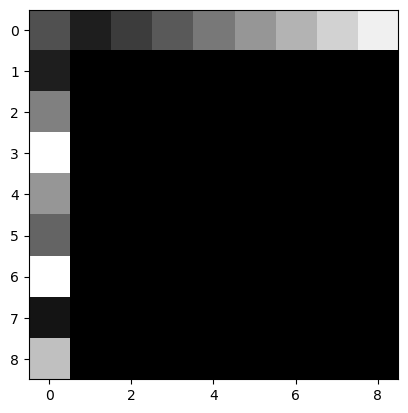

80
-> 48


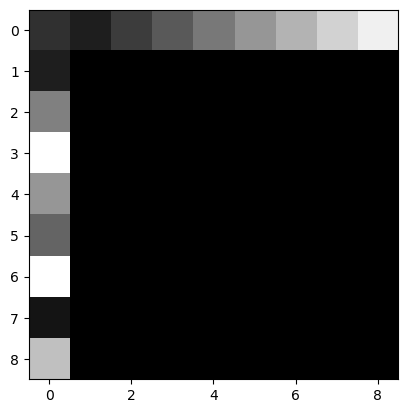

In [1170]:
out2 = dummy_image_4x2.copy()
out2[0][0] = 80

fig = plt.figure()
ax = fig.add_subplot()
ax.imshow(out2, cmap="gray")
plt.savefig(f'ifilter_corner_default.svg', format="svg", bbox_inches='tight')
plt.show()

print(out2[0][0])
out2[0][0] = (out2[1][0] * 5 + out2[0][1] * 5 + out2[0][0] * 6) // 16
print("->", out2[0][0])

fig = plt.figure()
ax = fig.add_subplot()
ax.imshow(out2, cmap='gray')
plt.savefig(f'ifilter_corner.svg', format="svg", bbox_inches='tight')
plt.show()    

### D.1.b. Edge Filter

[ 30  60  90 120 150 180 210 240] [ 30 128 255 150 100 255  20 192]
[135 197 164 151 158 122 149 192] [ 60  90 120 150 180 210 233 240]


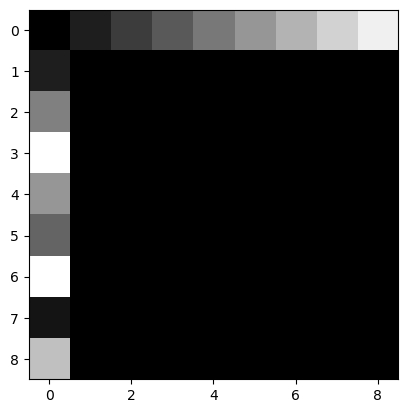

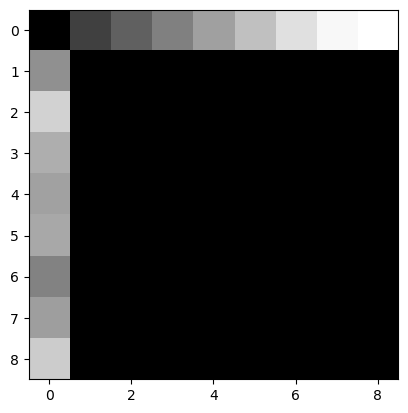

In [1171]:
intra_edge_kernel = np.asarray([
    [0, 4, 8, 4, 0],
    [0, 5, 6, 5, 0],
    [2, 4, 4, 4, 2]
])

new_out = dummy_image_4x2.copy()
edge_aboveRow = new_out[0, 1:].copy()
edge_leftCol = new_out[1:, 0].copy().reshape(-1)
print(edge_aboveRow, edge_leftCol)

strength_above = 1 # top
strength_left = 1 # left

def clip3(x, y, z):
    # np.clip(z, x, y)
    if z < x:
        return x
    elif z > y:
        return y
    else:
        return z
    
    
sz = 8
new_edge_leftCol = edge_leftCol.copy()
for i in range(1, sz):
    s = 0
    for j in range(5):
        k = clip3(0, sz - 1, i + j - 2)
        s += intra_edge_kernel[strength_left - 1, j] * edge_leftCol[k]
    new_edge_leftCol[i - 1] = clip3(0, 255, (s + 8) // 16)
new_edge_aboveRow = edge_aboveRow.copy()
for i in range(1, sz):
    s = 0
    for j in range(5):
        k = clip3(0, sz - 1, i + j - 2)
        s += intra_edge_kernel[strength_above - 1, j] * edge_aboveRow[k]
    new_edge_aboveRow[i - 1] = clip3(0, 255, (s + 8) // 16)
print(new_edge_leftCol, new_edge_aboveRow)
new_out[0, 1:] = new_edge_aboveRow
new_out[1:, 0] = new_edge_leftCol

fig = plt.figure()
ax = fig.add_subplot()
ax.imshow(dummy_image_4x2, cmap='gray')
plt.savefig(f'filter_edge_default.svg', format="svg", bbox_inches='tight')
plt.show()  

fig = plt.figure()
ax = fig.add_subplot()
ax.imshow(new_out, cmap='gray')
plt.savefig(f'filter_edge_strengthen.svg', format="svg", bbox_inches='tight')
plt.show()    

### D.1.c. Edge Upsample

In [1172]:
w, h = 8, 8
pAngle = 45
numPxA = w + h if pAngle < 90 else w

numPxL = w + h if pAngle > 180 else h

def if_upsample(d, wh, t):
    if d <= 0 or d >= 40:
        return False
    if t == 0:
        return wh <= 16
    return wh <= 8

upsample_a = if_upsample(pAngle - 90, w + h, 0)
upsample_l = if_upsample(pAngle - 180, w + h, 0)

def make_dup(src, numPx):
    dup = np.zeros(numPx + 3)
    dup[0] = src[-1]
    for i in range(-1, numPx):
        dup[i + 2] = buf[i]
def upsample(numPx, upsamplingLeft):
    buf = new_edge_aboveRow if upsamplingLeft == 0 else new_edge_leftCol


## D.3. Color Palette Prediction

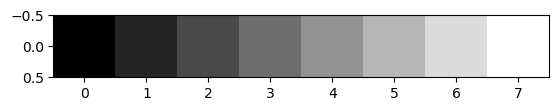

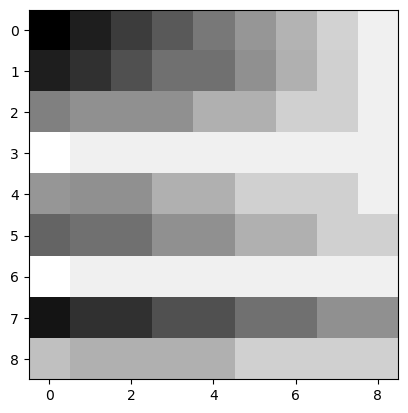

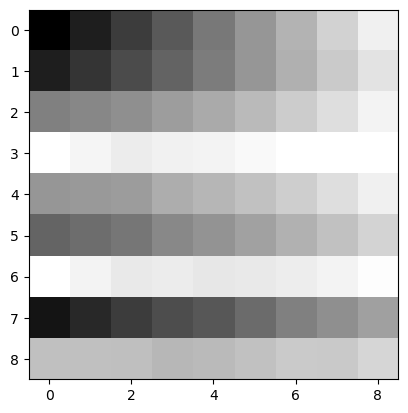

In [1173]:
out2 = dummy_image_4x2.copy()
out3 = out.copy()

palette = np.asarray([16 + p * 32 for p in range(8)])

fig = plt.figure()
ax = fig.add_subplot()
ax.imshow([palette], cmap='gray')
plt.show()    
mapY = []
startX, startY = 1, 1
w, h = 8, 8

for i in range(h):
    for j in range(w):
        color = out3[startX + i][startY + j]
        paletted_color = np.abs(palette - color)
        min_idx = np.argmin(paletted_color)
        out2[startX + i][startY + j] = palette[min_idx]

fig = plt.figure()
ax = fig.add_subplot()
ax.imshow(out2, cmap='gray')
plt.savefig(f'palette.svg', format="svg", bbox_inches='tight')
plt.show()    

fig = plt.figure()
ax = fig.add_subplot()
ax.imshow(out3, cmap='gray')
plt.savefig(f'palette_default.svg', format="svg", bbox_inches='tight')
plt.show()    

## D.4. Paeth Prediction

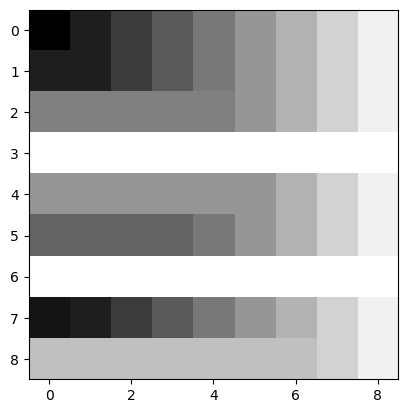

In [1174]:
def paeth(src, w, h):
    TL = src[0, 0]
    for i in range(h):
        L = src[1+i, 0]
        for j in range(w):
            T = src[0, 1+j]
            base = T + L - TL
            pLeft, pTop, pTopLeft = abs(base - L), abs(base - T), abs(base - TL)
            if pLeft <= pTop and pLeft <= pTopLeft:
                src[i+1][j+1] = L
            elif pTop <= pTopLeft:
                src[i+1][j+1] = T
            else:
                src[i+1][j+1] = TL
    return src

out4 = dummy_image_4x2.copy()
out4 = paeth(out4, 8, 8)

fig = plt.figure()
ax = fig.add_subplot()
ax.imshow(out4, cmap='gray')
plt.savefig(f'paeth.svg', format="svg", bbox_inches='tight')
plt.show()    

## D.5. Smooth Prediction

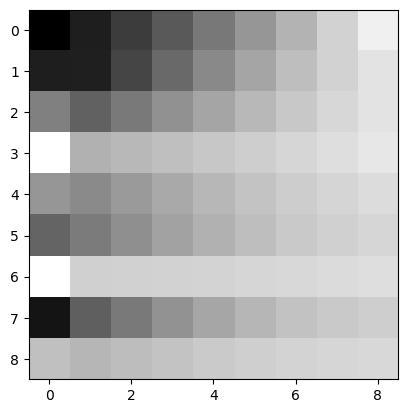

In [1175]:
out5 = dummy_image_4x2.copy()

sm_weights_tx_8x8 = np.asarray([
    255, 197, 146, 105, 73, 50, 37, 32
])

for i in range(h):
    for j in range(w):
        weight_v = sm_weights_tx_8x8[i]
        weight_h = sm_weights_tx_8x8[j]
        # smooth_v_pred
        p_v = weight_v * dummy_image_4x2[0, 1+j] + (256 - weight_v) * dummy_image_4x2[h, 0]
        # smooth_h_pred
        p_h = weight_h * dummy_image_4x2[1+i, 0] + (256 - weight_h) * dummy_image_4x2[0, w]
        p = p_h + p_v
        out5[1+i][1+j] = np.clip((p + 256) / 512, 0, 255)
        
fig = plt.figure()
ax = fig.add_subplot()
ax.imshow(out5, cmap='gray')
plt.savefig(f'smooth.svg', format="svg", bbox_inches='tight')
plt.show()    

## D.6. DC Prediction

138.125 138


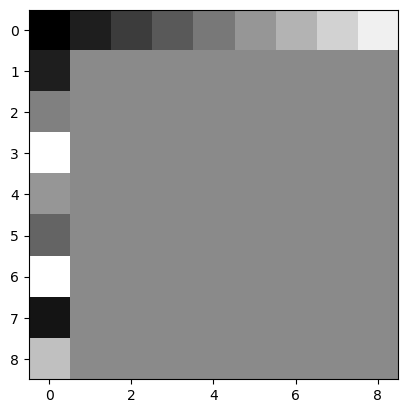

In [1176]:
dc = np.mean(np.concatenate([dummy_image_4x2[1:, 0].reshape(-1), dummy_image_4x2[0, 1:].reshape(-1)], axis=0))

out6 = dummy_image_4x2.copy()
for i in range(1, h+1):
    for j in range(1, w+1):
        out6[i][j] = int(dc)
        
print(dc, int(dc))
fig = plt.figure()
ax = fig.add_subplot()
ax.imshow(out6, cmap='gray')
plt.savefig(f'dc.svg', format="svg", bbox_inches='tight')
plt.show()  

# E. Transform Coding

## E.1. Kernel and function Prepare

In [1177]:
import math
def DCT_func(k, N):
    return np.asarray([math.cos((2*n+1)*k*math.pi/(2*N)) for n in range(N)])

def ADST_func(k, N):
    return np.asarray([math.sin((2*n+1)*(2*k+1)*math.pi/(4*N)) for n in range(N)])

def FLIPADST_func(k, N):
    return ADST_func(k, N)[::-1]

def IDTX_func(k, N):
    return np.asarray([1 if n == k else 0 for n in range(N)])

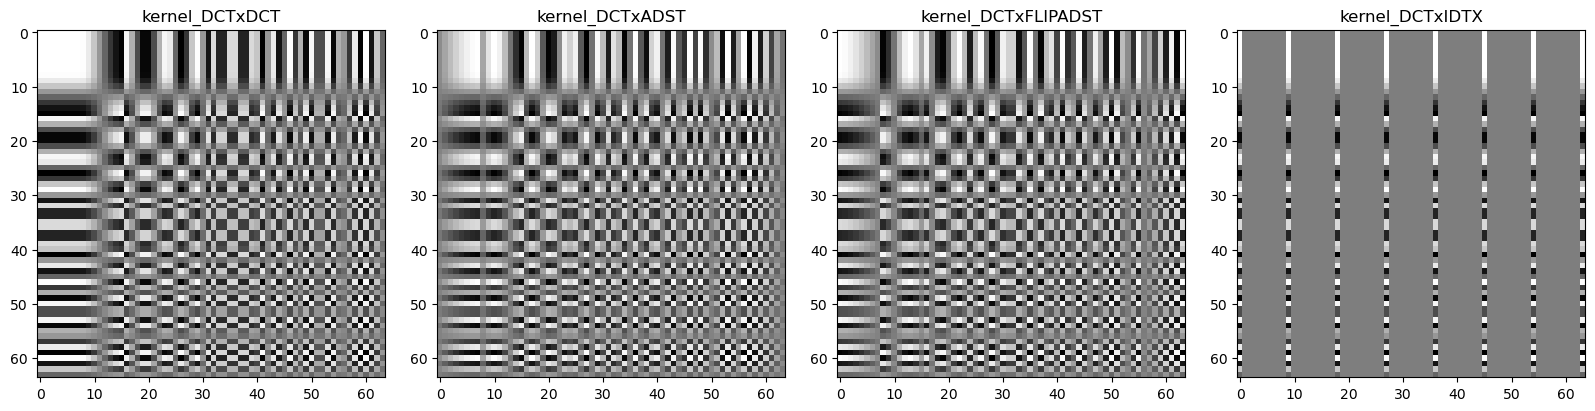

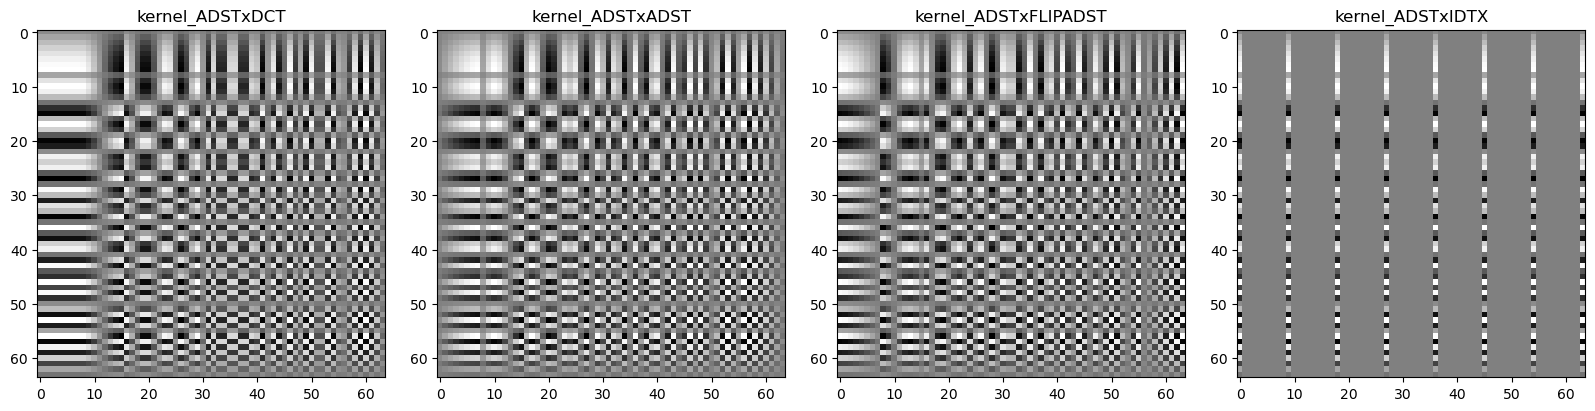

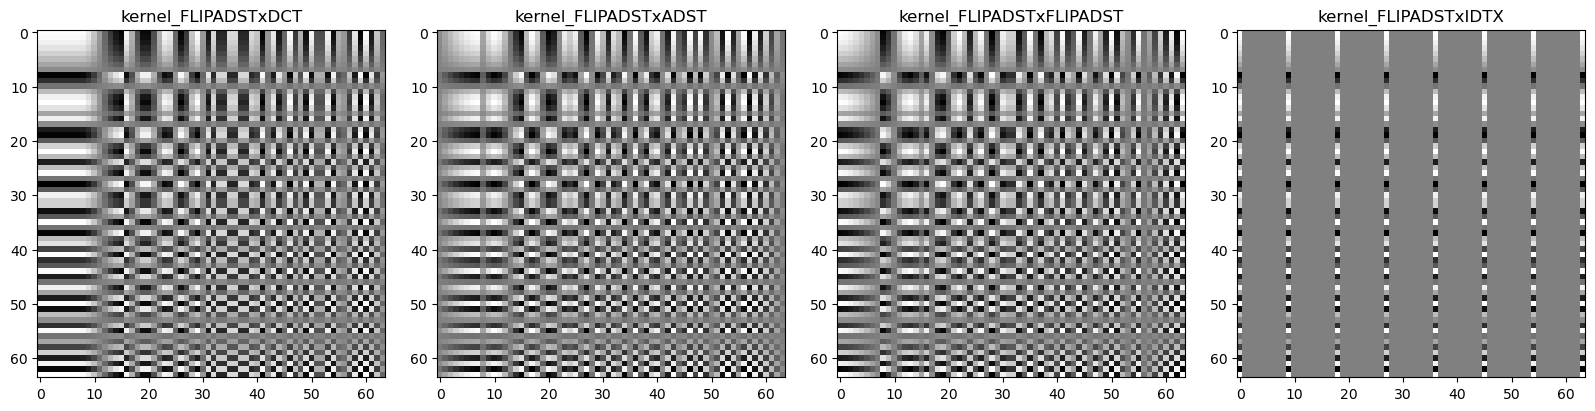

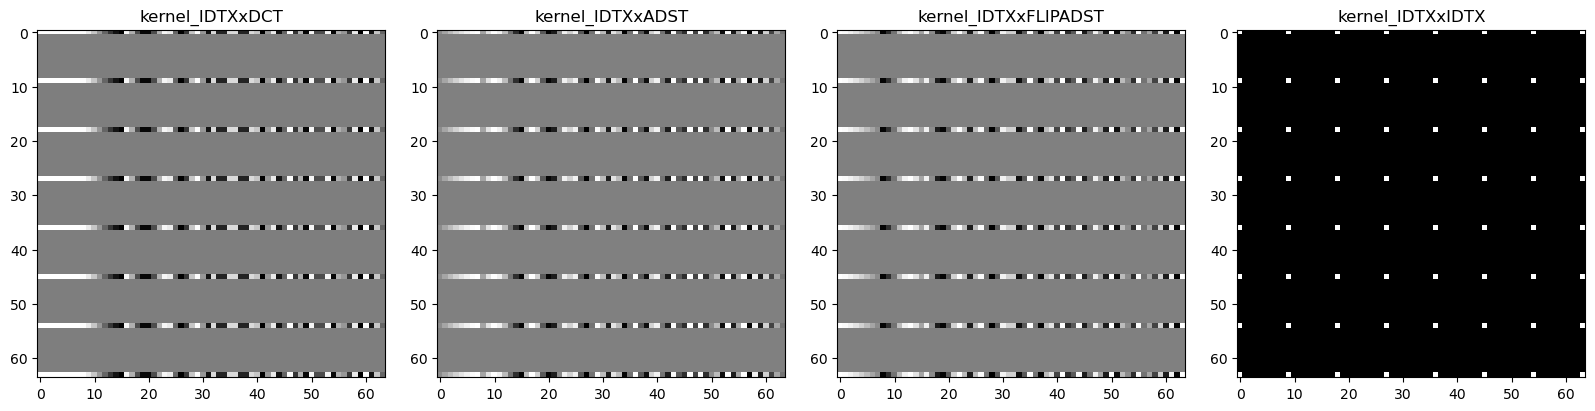

In [1178]:
dim = 8
func_list = [DCT_func, ADST_func, FLIPADST_func, IDTX_func]
func_name = ["DCT", "ADST", "FLIPADST", "IDTX"]

tx_kernels = [[None for _ in range(4)] for _ in range(4)]
for row_idx, func_row in enumerate(func_list):
    fig = plt.figure(layout='constrained', figsize=(16, 4))
    gs = GridSpec(1, 4, figure=fig)
    for col_idx, func_col in enumerate(func_list):
        display_kernel = np.ones((dim**2, dim**2))
        out_kernels = []
        for i in range(dim):
            for j in range(dim):
                offset_i, offset_j = dim * i, dim * j
                
                row = func_row(i, dim)
                col = func_col(j, dim)
                kernel = np.outer(row, col.T)
                display_kernel[offset_i:offset_i + dim, offset_j:offset_j + dim] = kernel
                out_kernels += [kernel]
        tx_kernels[row_idx][col_idx] = np.asarray(out_kernels)
        
        
        ax = fig.add_subplot(gs[0, col_idx])
        ax.imshow((display_kernel + 1) * 0.5, cmap='gray')
        ax.set_title(f"kernel_{func_name[row_idx]}x{func_name[col_idx]}")
        fig.savefig(f'kernel_{func_name[row_idx]}x{func_name[col_idx]}.svg', format="svg", bbox_inches='tight')
    plt.show()        

## E.2. PSNR function

In [1179]:
def calc_psnr(src, trg, cap=255.0):
    mse = np.mean(np.square(src / cap - trg / cap))
    if mse == 0:
        return float('inf')
    psnr = -10 * np.log10(mse)
    return psnr

## E.3. SGD Learner (to get kernel coeffs)

In [1198]:
class StocasticGradientDescenter:
    def __init__(self, lr, epochs, threshold):
        self.learning_rate = lr
        self.epochs = epochs
        self.threshold = threshold
    
    def initialize(self, img_size, weight_len):
        self.img_size = img_size
        self.weights = np.random.rand(weight_len, 1)
        
    def loss(self, pred, target, to_sum=0):
        if to_sum:
            return np.mean(np.square(target - pred))
        else:
            return np.sqaure(target - pred)
    
    def predict(self, src):
        # (HW, C) dot (C, C*) -> (HW, C')
        res = np.dot(src, self.weights)
        return res
        
    def fit(self, src, target, epochs=None, debug=False):
        epochs = self.epochs or epochs
        for e in range(epochs):
            pred = self.predict(src)
            
            weights_derivative = -2 * (np.dot(src.T, (target - pred)))
            self.weights = self.weights - (self.learning_rate * weights_derivative)
            cur_loss = self.loss(pred, target, to_sum=1)
            if e % 1000 == 0 and debug:
                print(f"#Epoch {e}: Loss - {cur_loss:.8f}", end='\r')
            if cur_loss < self.threshold:
                break
        if debug:
            print()
        return self.loss(pred, target, to_sum=1)
        
    def get_weights(self):
        return self.weights

## E.4. Load Sample Image (256x256) from (512x512)

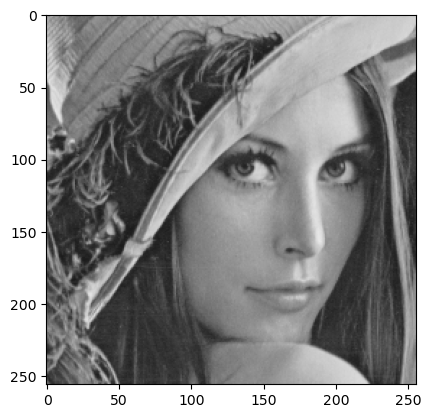

In [1199]:
import PIL

sample_image = PIL.Image.open("lenna.png", "r").convert("L")
sample_image = np.array(sample_image, dtype=np.float32)
offset_i, offset_j = 160, 128

w, h = 256, 256
dim = 8
block_cnt_w, block_cnt_h = w // dim, h // dim # (32, 32) = 1024개 블록.

fig = plt.figure()
ax = fig.add_subplot()
target_sample = sample_image[offset_i:offset_i+h, offset_j:offset_j+w]
ax.imshow(target_sample, cmap='gray', vmin=0, vmax=255)
plt.show()    

## E.5. Get Kernel Weights using SGD (Consumes long time)

In [1200]:
descenters = [
    [
        [
            [StocasticGradientDescenter(lr=1e-4, epochs=6000, threshold=1e-10) for _ in range(4)]
            for _ in range(4)
        ]
        for _ in range(block_cnt_w)] 
    for _ in range(block_cnt_h)
]

for i in range(block_cnt_h):
    for j in range(block_cnt_w):
        for k in range(4):
            for l in range(4):
                descenters[i][j][k][l].initialize(dim, tx_kernels[k][l].shape[0])

In [1207]:
recon_imgs = [[target_sample.copy() for l in range(4)] for k in range(4)]

for i in range(block_cnt_h):
    for j in range(block_cnt_w):
        offset_i, offset_j = dim * i, dim * j
        
        target = target_sample[offset_i:offset_i + dim, offset_j:offset_j + dim].reshape([dim**2, -1])
        losses = []
        for k in range(4):
            for l in range(4):
                inputs = tx_kernels[k][l].transpose((1, 2, 0)).reshape((dim**2, -1))
                loss = descenters[i][j][k][l].fit(inputs, target, epochs=2000)
                recon_imgs[k][l][offset_i:offset_i + dim, offset_j:offset_j + dim] = descenters[i][j][k][l].predict(inputs).reshape([dim, dim])
                losses += [loss]
        print(f"({i}/{block_cnt_h-1}, {j}/{block_cnt_w-1})", "Train Finished with loss", losses)

(0/31, 0/31) Train Finished with loss [9.880829009569787e-13, 9.921824261062613e-13, 9.906904757052821e-13, 4.967419052755416e-07, 9.875865928837986e-13, 9.934919657378304e-13, 9.926094510449008e-13, 0.00011279678704463644, 9.904239429860749e-13, 9.880741255522463e-13, 9.93301246753261e-13, 0.00011265360716965062, 6.595823226030223e-07, 0.00011251790293699917, 0.00011260645996366213, 203.6887835718985]
(0/31, 1/31) Train Finished with loss [9.884680163280037e-13, 9.889365597265731e-13, 9.893101553212705e-13, 3.4308864390455123e-07, 9.881686482794957e-13, 9.88366531169531e-13, 9.932958616785576e-13, 8.483098415518436e-05, 9.876056412227219e-13, 9.916660426224933e-13, 9.93460334432862e-13, 8.491897124779037e-05, 4.781188738387038e-07, 8.48755920699727e-05, 8.483321678143707e-05, 153.50500931370925]
(0/31, 2/31) Train Finished with loss [9.892289649613571e-13, 9.909999339748613e-13, 9.880755497637788e-13, 2.8358649309152344e-07, 9.887795233319944e-13, 9.918075374057896e-13, 9.901913365704

## E.6. Visualize Kernel Effect

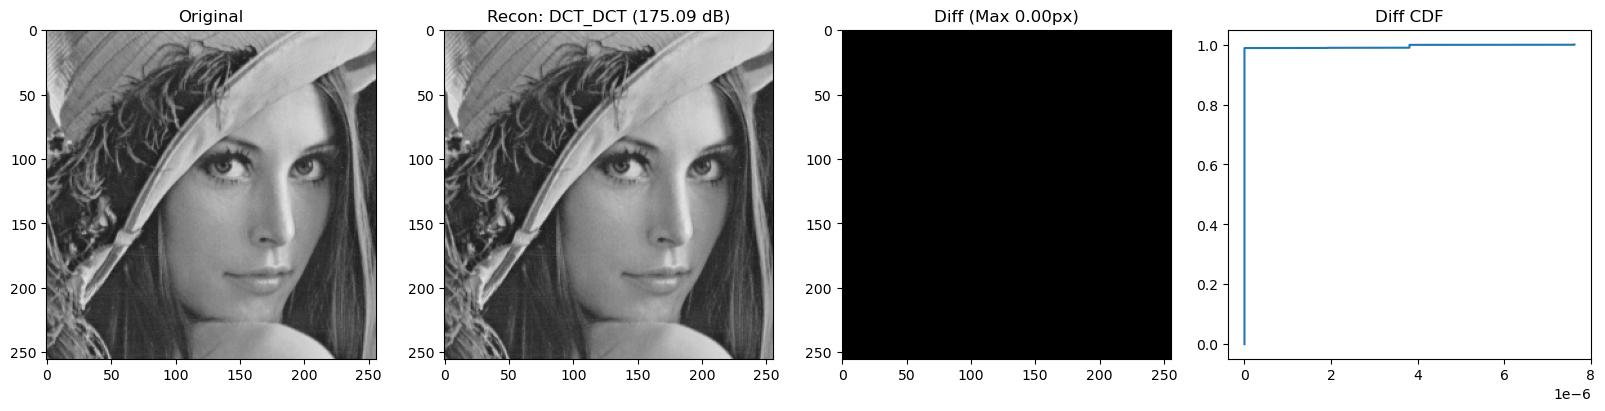

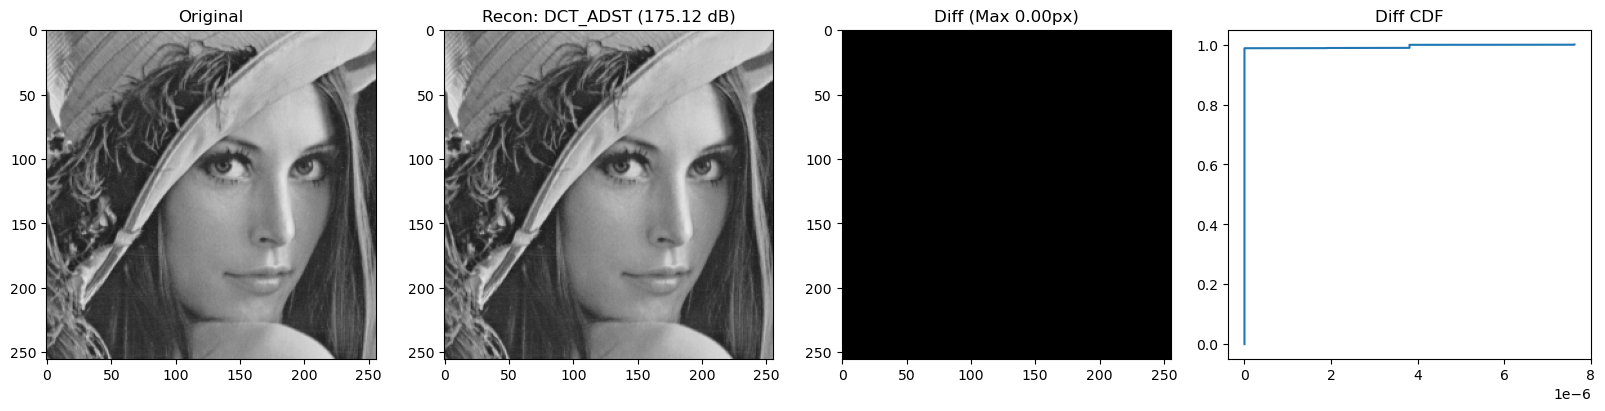

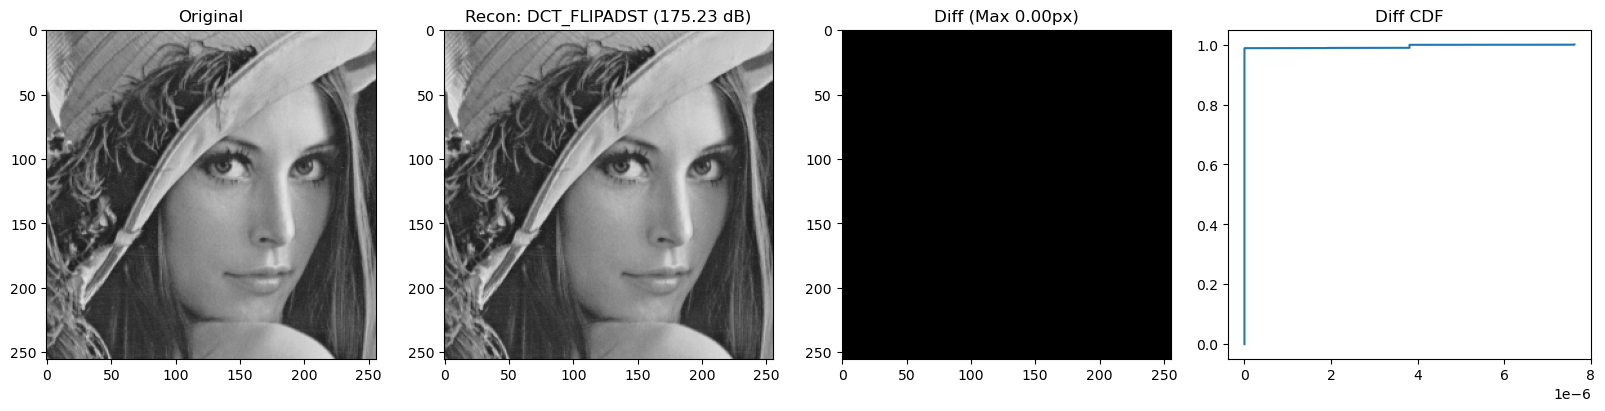

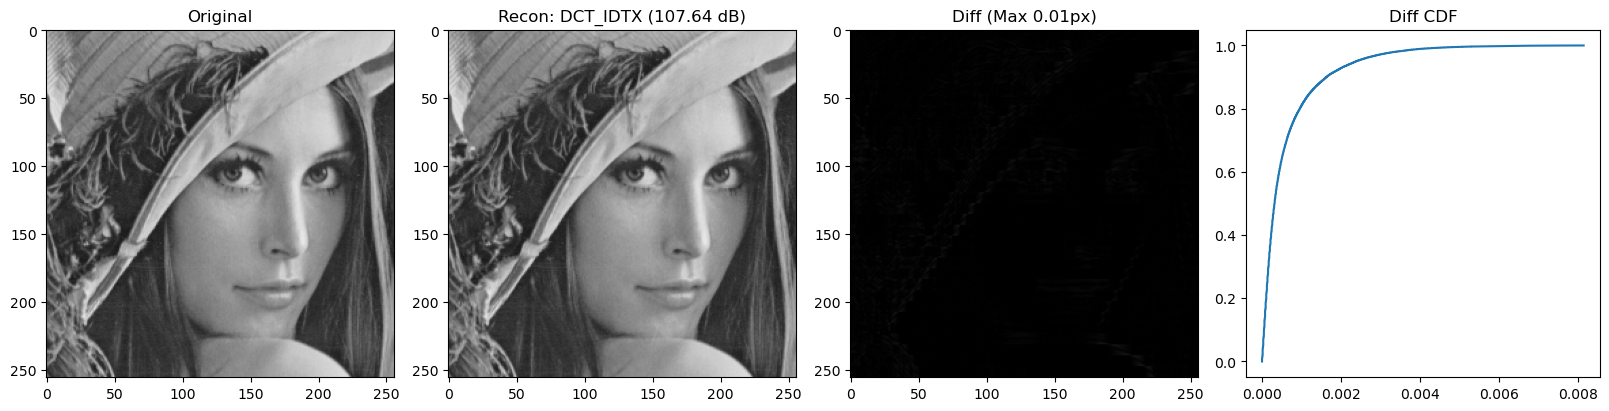

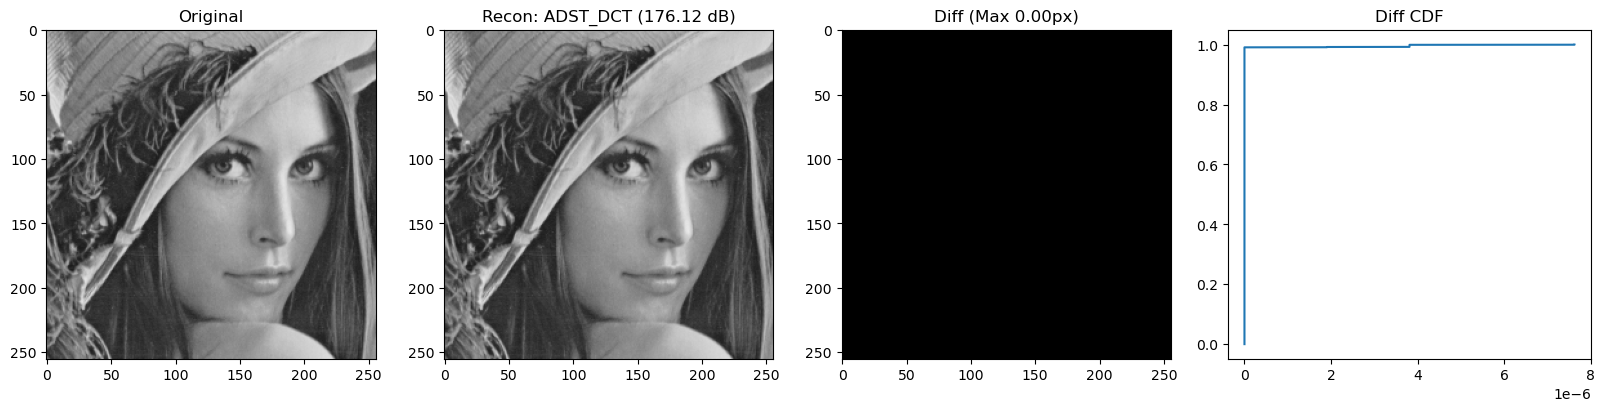

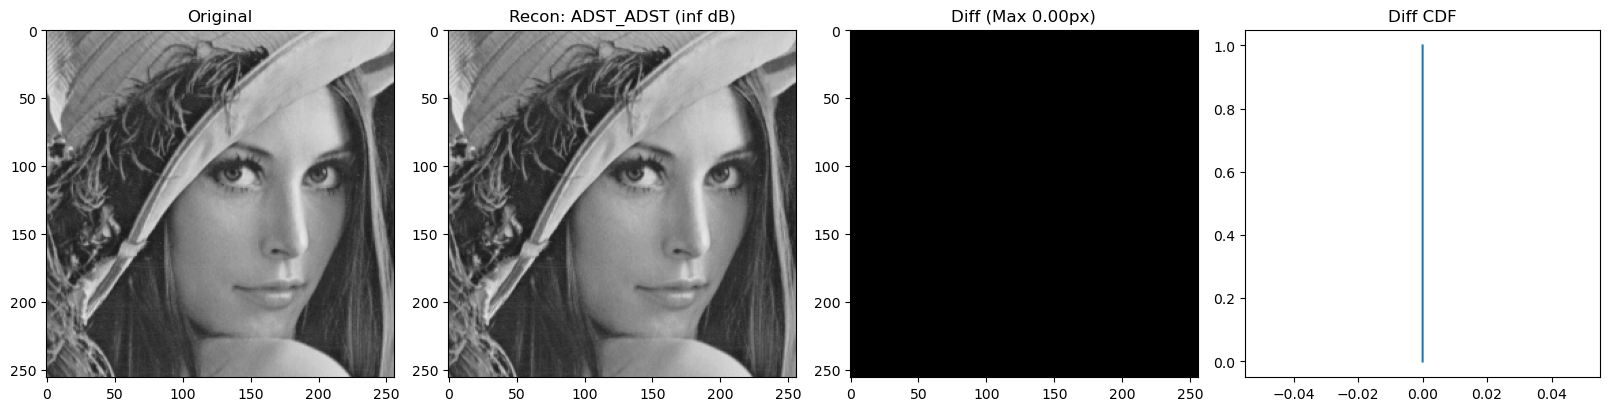

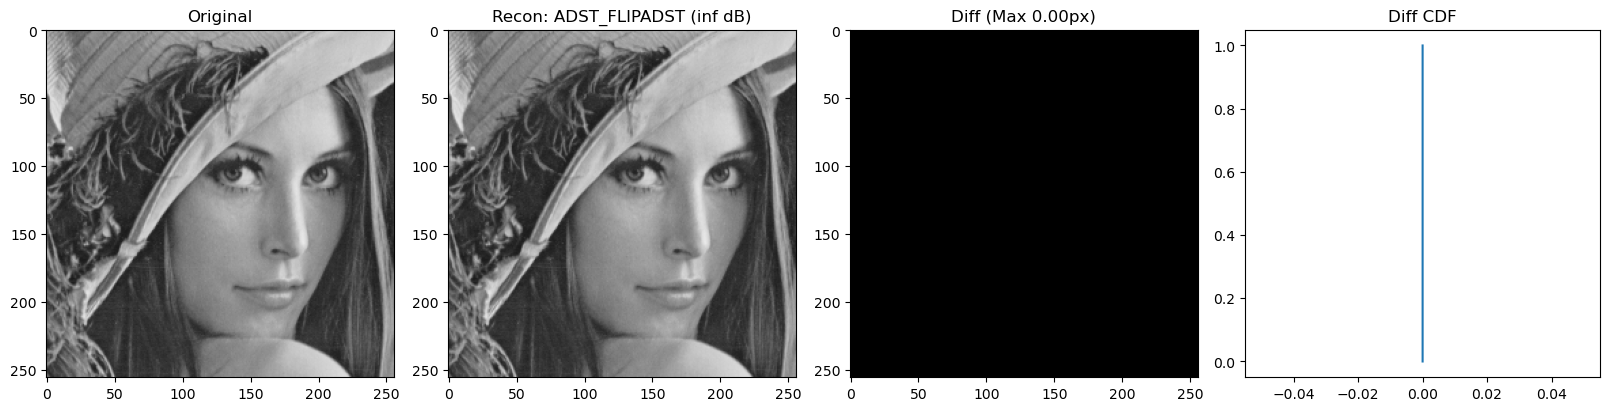

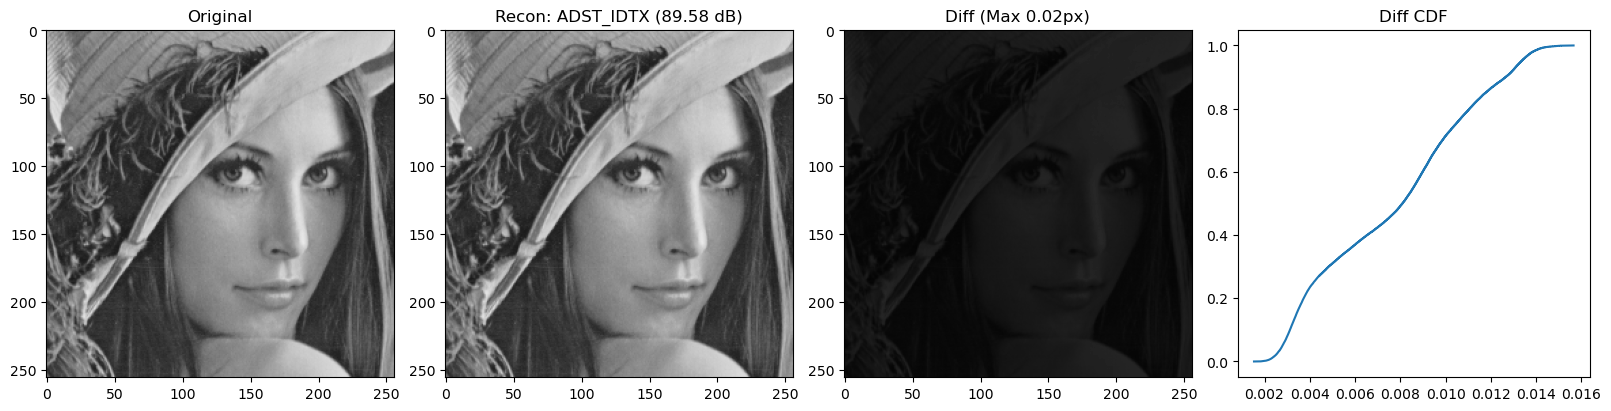

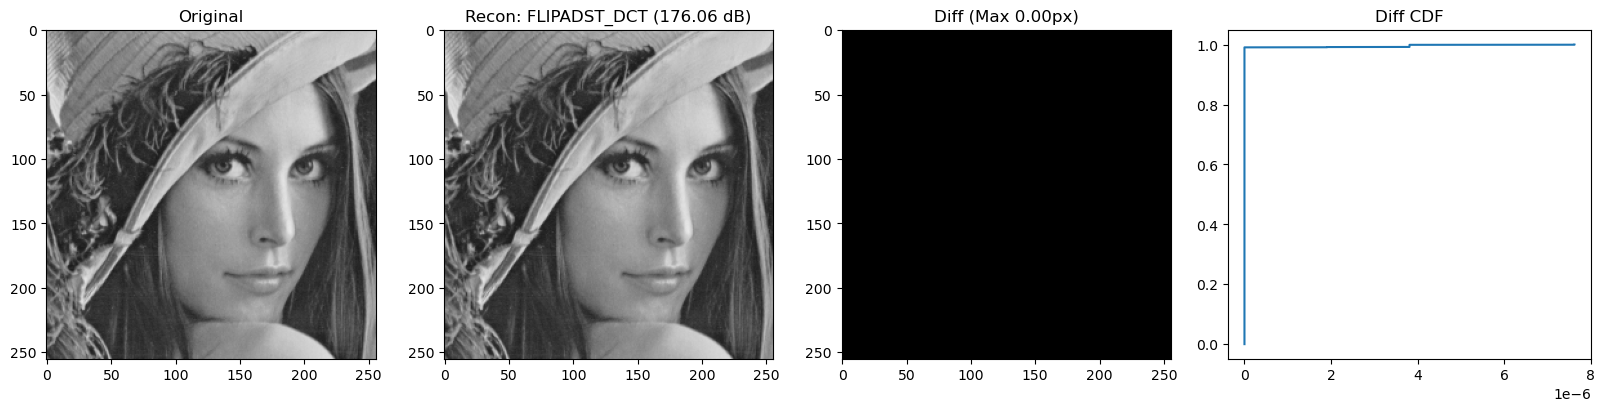

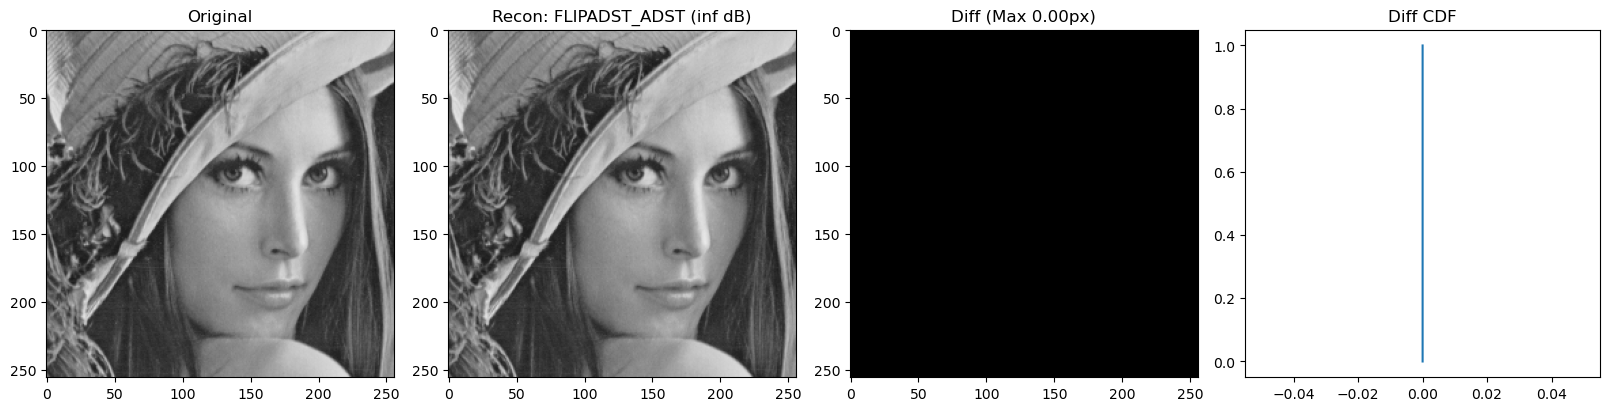

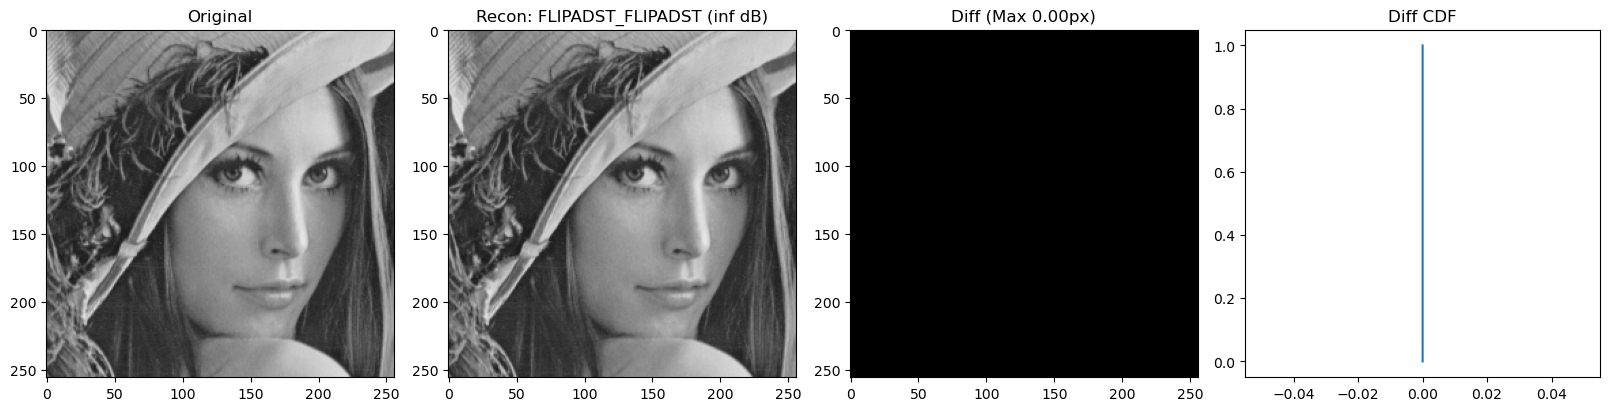

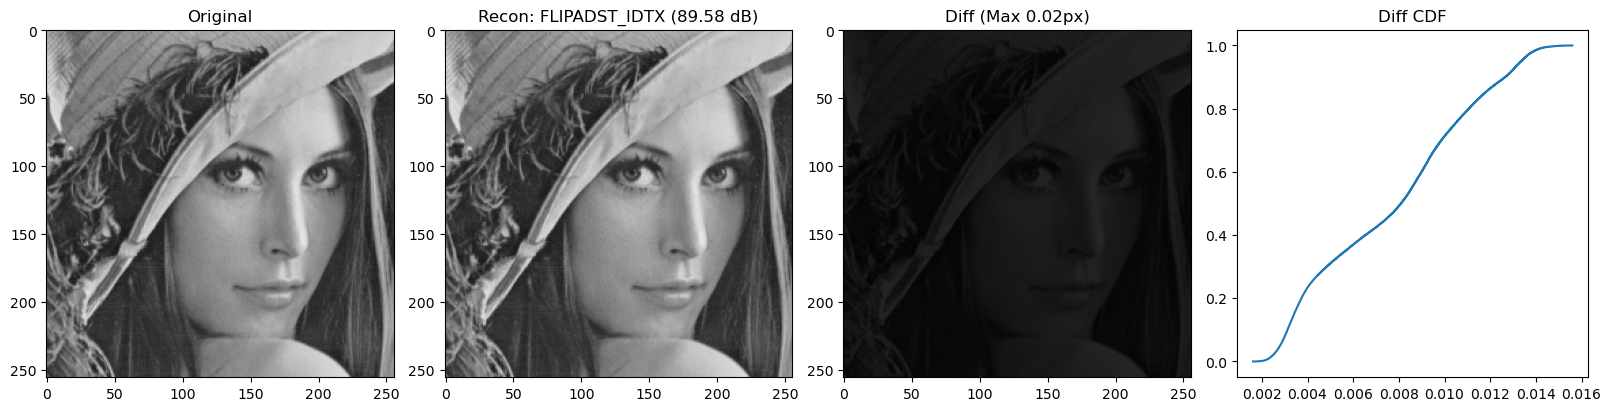

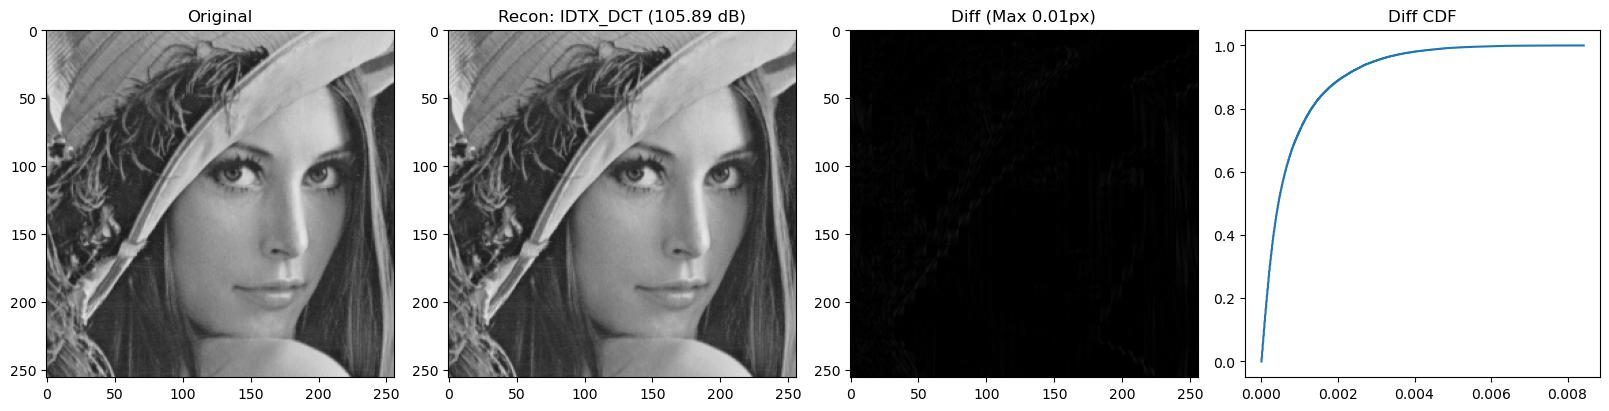

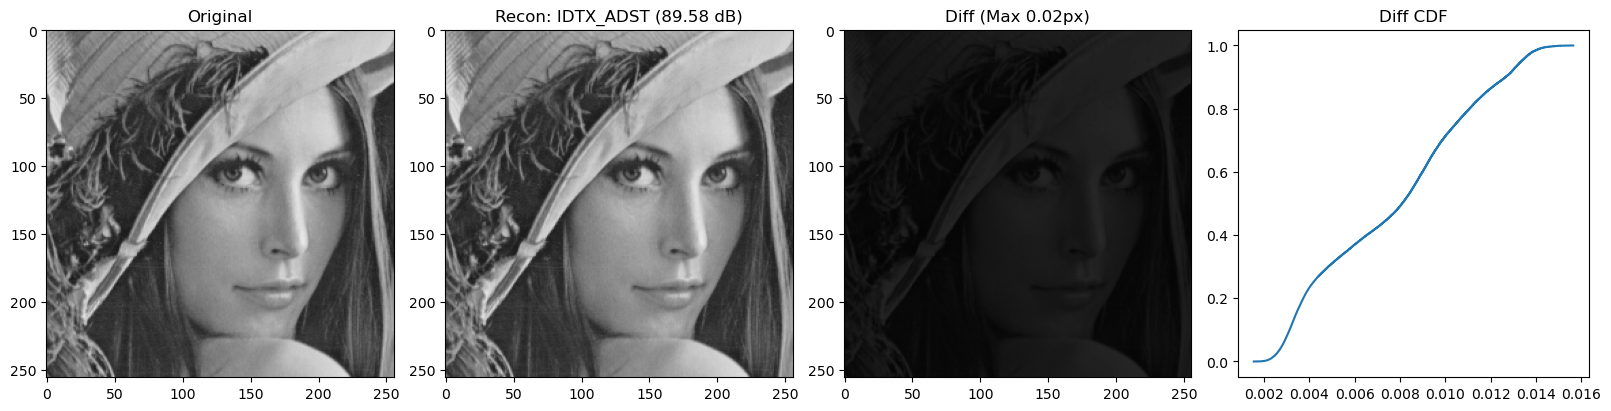

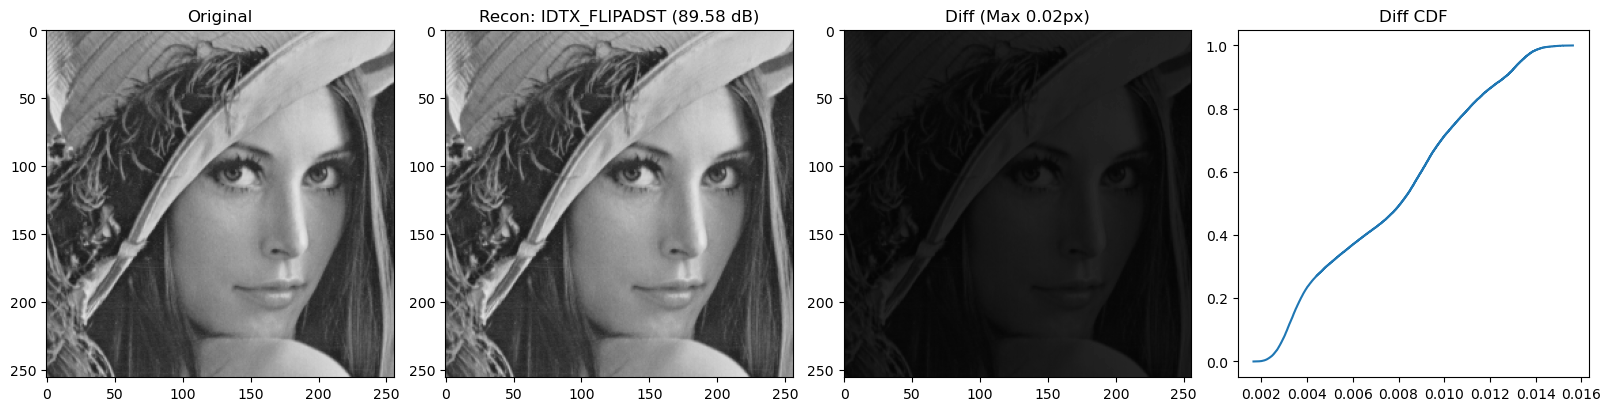

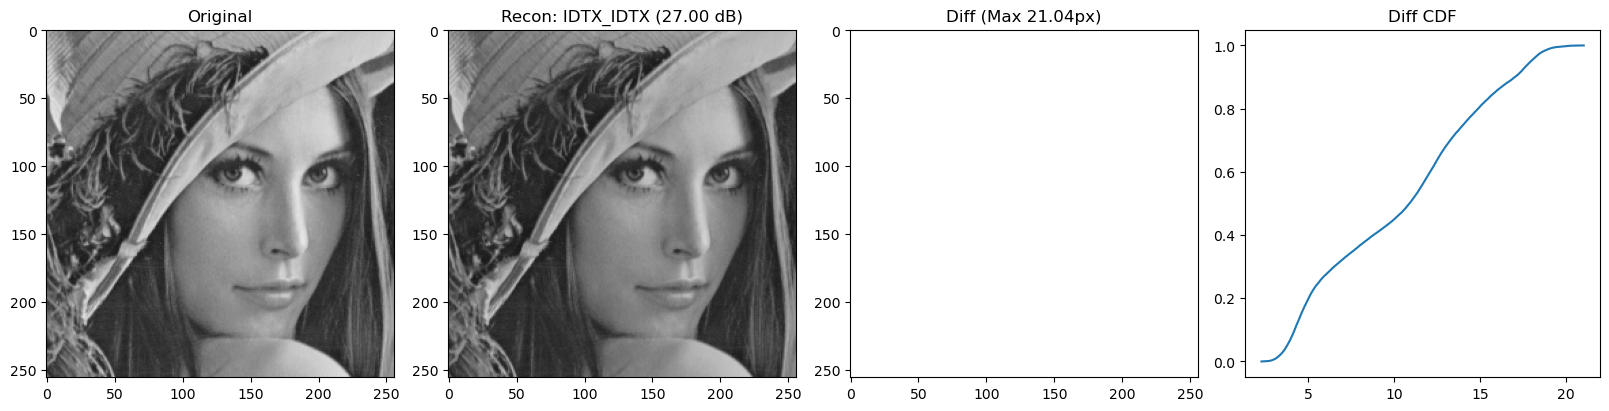

In [1208]:
for i in range(4):
    for j in range(4):
        diff_abs = np.abs(recon_imgs[i][j] - target_sample)
        diff_sorted = np.sort(diff_abs.reshape(-1))
        psnr = calc_psnr(recon_imgs[i][j], target_sample)
        
        fig = plt.figure(layout='constrained', figsize=(16, 4))
        gs = GridSpec(1, 4, figure=fig)
        
        ax = fig.add_subplot(gs[0, 0])
        ax.set_title("Original")
        ax.imshow(target_sample, cmap='gray', vmin=0, vmax=255)
        
        ax = fig.add_subplot(gs[0, 1])
        ax.set_title(f"Recon: {func_name[i]}_{func_name[j]} ({psnr:.2f} dB)")
        ax.imshow(recon_imgs[i][j], cmap='gray', vmin=0, vmax=255)
        
        ax = fig.add_subplot(gs[0, 2])
        ax.set_title(f"Diff (Max {np.max(diff_abs):.2f}px)")
        ax.imshow(diff_abs, cmap='gray', vmin=0, vmax=0.1)

        ax = fig.add_subplot(gs[0, 3])
        ax.set_title("Diff CDF")
        ax.plot(diff_sorted, np.arange(len(diff_sorted)) / len(diff_sorted))  
        
        plt.show()    

# F. Quantization

## F.1. Prepare QP step & Quantizer

In [1209]:
DC_Qlookup = [
    4, 8, 8, 9, 10, 11, 12, 12, 13, 14, 15, 16,
    17, 18, 19, 19, 20, 21, 22, 23, 24, 25, 26, 26,
    27, 28, 29, 30, 31, 32, 32, 33, 34, 35, 36, 37,
    38, 38, 39, 40, 41, 42, 43, 43, 44, 45, 46, 47,
    48, 48, 49, 50, 51, 52, 53, 53, 54, 55, 56, 57,
    57, 58, 59, 60, 61, 62, 62, 63, 64, 65, 66, 66,
    67, 68, 69, 70, 70, 71, 72, 73, 74, 74, 75, 76,
    77, 78, 78, 79, 80, 81, 81, 82, 83, 84, 85, 85,
    87, 88, 90, 92, 93, 95, 96, 98, 99, 101, 102, 104,
    105, 107, 108, 110, 111, 113, 114, 116, 117, 118, 120, 121,
    123, 125, 127, 129, 131, 134, 136, 138, 140, 142, 144, 146,
    148, 150, 152, 154, 156, 158, 161, 164, 166, 169, 172, 174,
    177, 180, 182, 185, 187, 190, 192, 195, 199, 202, 205, 208,
    211, 214, 217, 220, 223, 226, 230, 233, 237, 240, 243, 247,
    250, 253, 257, 261, 265, 269, 272, 276, 280, 284, 288, 292,
    296, 300, 304, 309, 313, 317, 322, 326, 330, 335, 340, 344,
    349, 354, 359, 364, 369, 374, 379, 384, 389, 395, 400, 406,
    411, 417, 423, 429, 435, 441, 447, 454, 461, 467, 475, 482,
    489, 497, 505, 513, 522, 530, 539, 549, 559, 569, 579, 590,
    602, 614, 626, 640, 654, 668, 684, 700, 717, 736, 755, 775,
    796, 819, 843, 869, 896, 925, 955, 988, 1022, 1058, 1098, 1139,
    1184, 1232, 1282, 1336
] # / 32 - 8bit (Main Profile)

In [1210]:
class Quantizer():
    def __init__(self, coeffs, display_name, i, j):
        self.coeffs = coeffs
        self.quantized = None
        self.level = 255
        self.q_rate = 1.0
        self.i = i
        self.j = j
        self.display_name = display_name
    
    def quantize(self, level=0):
        temp = np.asarray(self.coeffs * 32 / DC_Qlookup[level], dtype=np.int32)
        self.quantized = np.asarray(temp, dtype=np.float32) * DC_Qlookup[level] / 32
        self.level = level
        self.q_rate = np.count_nonzero(self.quantized) / len(self.coeffs)
        

    def predict(self, src):
        res = np.dot(src, np.expand_dims(self.quantized, -1))
        return res

## F.2. Quantize & Kernel select under cond.

In [1211]:
quant_imgs = [[target_sample.copy() for l in range(4)] for k in range(4)]
quantizers = [[[[Quantizer(ds[i][j].get_weights().reshape(-1), f"{func_name[i]}_{func_name[j]}", i, j) for i in range(4)] for j in range(4)] for ds in row] for row in descenters]
selected_quantizers = [[None for d in row] for row in descenters]

target_config = {
    "psnr": 34,
    "NonZero": None,
    "QP": None
}

t0 = time.time()
for i in range(block_cnt_h):
    for j in range(block_cnt_w):
        offset_i, offset_j = dim * i, dim * j

        target = target_sample[offset_i:offset_i + dim, offset_j:offset_j + dim]
        for k in range(4):
            for l in range(4):
                quantizer = quantizers[i][j][k][l]
        
                inputs = tx_kernels[k][l].transpose([1, 2, 0]).reshape([dim**2, -1])

                for lv in range(255):
                    quantizer.quantize(lv)
                    pred = quantizer.predict(inputs).reshape([dim, dim])
                    
                    if target_config["psnr"]:
                        if calc_psnr(pred, target, 255) <= target_config["psnr"]:
                            if lv > 0:
                                quantizer.quantize(lv - 1)
                                quant_imgs[k][l][offset_i:offset_i + dim, offset_j:offset_j + dim] = quantizer.predict(inputs).reshape((dim, dim))
                            else:
                                quantizer.level = -1
                                quantizer.q_rate = 1.0
                                quant_imgs[k][l][offset_i:offset_i + dim, offset_j:offset_j + dim] = pred
                            break
                    elif target_config["NonZero"]:
                        pass ## TODO
                        
                    elif target_config["QP"]:
                        pass ## TODO
        
        min_q_rate = quantizers[i][j][0][0].q_rate
        selected_quantizer = quantizers[i][j][0][0]
        for k in range(4):
            for l in range(4):
                quantizer = quantizers[i][j][k][l]
                if quantizer.q_rate < min_q_rate:
                    min_q_rate = quantizer.q_rate
                    selected_quantizer = quantizer

        selected_quantizers[i][j] = selected_quantizer
t1 = time.time()
print(f"{(t1-t0):.3f}sec Elapsed for processing {block_cnt_h * block_cnt_w} blocks.")

total_quant_img = target_sample.copy()
for i in range(block_cnt_h):
    for j in range(block_cnt_w):
        offset_i, offset_j = dim * i, dim * j
        
        quantizer = selected_quantizers[i][j]
        inputs = tx_kernels[quantizer.i][quantizer.j].transpose([1, 2, 0]).reshape([dim**2, -1])
        pred = quantizer.predict(inputs).reshape([dim, dim])
        total_quant_img[offset_i:offset_i + dim, offset_j:offset_j + dim] = pred

3.475sec Elapsed for processing 1024 blocks.


## F.3. Visualize Quantized Result

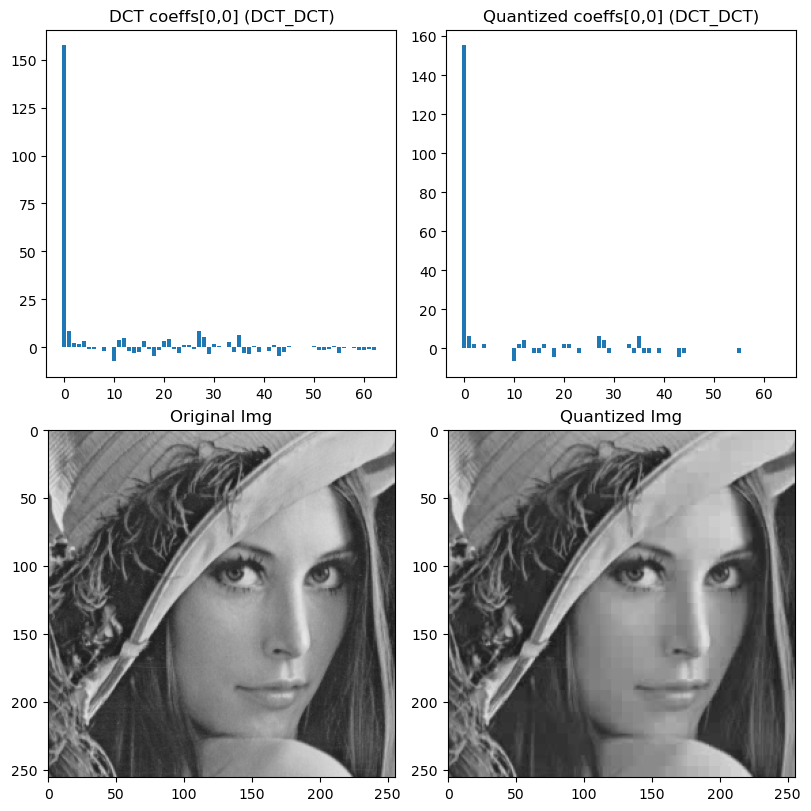

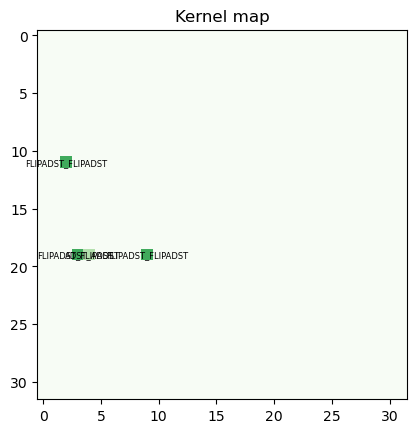

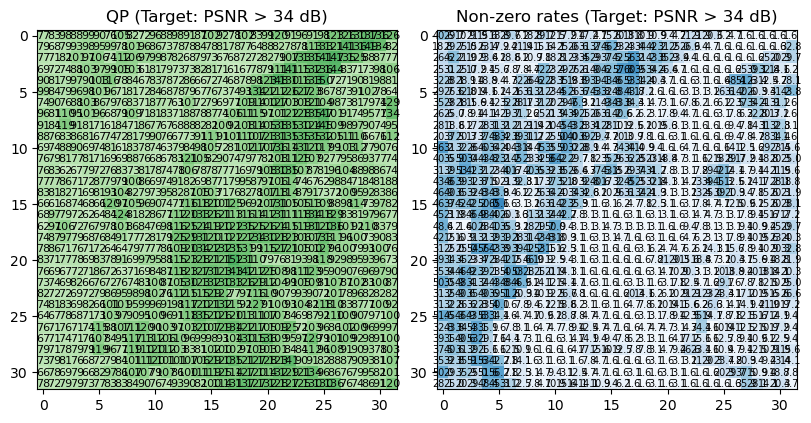

Non-zero coeffs 비율 18.39%
34.9088978767395 dB


In [1212]:
q_00 = selected_quantizers[0][0]
if target_config["psnr"]:
    target_constraint = f"PSNR > {target_config['psnr']} dB"

# DCT coeffs & Quantized coeffs
fig = plt.figure(layout='constrained', figsize=(8, 8))
gs = GridSpec(2, 2, figure=fig)

ax = fig.add_subplot(gs[0, 0])
ax.set_title(f"DCT coeffs[0,0] ({q_00.display_name})")
ax.bar(np.arange(dim**2), descenters[0][0][q_00.i][q_00.j].get_weights().reshape(-1))   

ax = fig.add_subplot(gs[0, 1])
ax.set_title(f"Quantized coeffs[0,0] ({q_00.display_name})")
ax.bar(np.arange(dim**2), q_00.quantized)  

# Original vs Quantized img
ax = fig.add_subplot(gs[1, 0])
ax.set_title("Original Img")
ax.imshow(target_sample, cmap='gray', vmin=0, vmax=255)  

ax = fig.add_subplot(gs[1, 1])
ax.set_title("Quantized Img")
ax.imshow(total_quant_img, cmap='gray', vmin=0, vmax=255)
plt.show()


# Kernel used map
fig = plt.figure()
ax = fig.add_subplot()
ax.set_title("Kernel map")
kernelmap_colors = np.zeros([block_cnt_h, block_cnt_w])
for i in range(block_cnt_h):
    for j in range(block_cnt_w):
        selected_q = selected_quantizers[i][j]
        kernelmap_colors[i][j] = (selected_q.i * 4) + selected_q.j
        if selected_q.i != 0 or selected_q.j != 0:
            ax.text(j, i, f"{selected_q.display_name}", fontsize=6.0, horizontalalignment='center', verticalalignment='center')
ax.imshow(kernelmap_colors, cmap='Greens', vmin=0, vmax=16)
plt.show()  


# QP & Non-zero Rates map
fig = plt.figure(layout='constrained', figsize=(8, 4))
gs = GridSpec(1, 2, figure=fig)

ax = fig.add_subplot(gs[0, 0])
ax.set_title(f"QP (Target: {target_constraint})")
level_colors = np.zeros([block_cnt_h, block_cnt_w])
for i in range(block_cnt_h):
    for j in range(block_cnt_w):
        selected_q = selected_quantizers[i][j]
        level_colors[i][j] = selected_q.level
        ax.text(j, i, f"{selected_q.level}", fontsize=8.0, horizontalalignment='center', verticalalignment='center')
ax.imshow(level_colors, cmap='Greens', vmin=0, vmax=255)

ax = fig.add_subplot(gs[0, 1])
ax.set_title(f"Non-zero rates (Target: {target_constraint})")
q_rate_colors = np.zeros([block_cnt_h, block_cnt_w])
for i in range(block_cnt_h):
    for j in range(block_cnt_w):
        selected_q = selected_quantizers[i][j]
        q_rate_colors[i][j] = selected_q.q_rate
        ax.text(j, i, f"{selected_q.q_rate * 100:.1f}", fontsize=7.0, horizontalalignment='center', verticalalignment='center')
ax.imshow(q_rate_colors, cmap='Blues', vmin=0, vmax=1)
plt.show()  

print("Non-zero coeffs 비율", f"{np.mean(q_rate_colors) * 100:.2f}%")
print(calc_psnr(total_quant_img, target_sample, 255), 'dB')